# 宿題４：Pandas (2) DataFrame の操作

データの説明です。（ネタ本のコードより）

「ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。
データの属性を理解し、分析をするためにデータを加工した後、
データの可視化を行うことで問題を発見していくプロセスを学びます。」

宿題4-1
「join_data_2」に "quantity" と "item_price" をかけて新たに "price" という列を作成し、「join_dtata_3.csv」として保存してください。

宿題4-2
「join_data_3」と「transaction」の"price"の総合計が同じになることを確認してください。

宿題4-3
「join_data_3」の以下の統計量を調べてください。
・欠損値
・各項目の統計（ヒント：Pandas の describe メソッドを使う）
・"payment_date"の始まりと終わり

宿題4-4
「join_data_3」の月ごとの売り上げ合計を求めてください。

宿題4-5
「join_data_3」の月別、商品別の売り上げと個数を集計してください。
（ヒント）Pandas のメソッドの groupby と pivot_table を使う。

宿題4-6
「join_data_3」の商品別の月間売上推移の折れ線グラフを描いてください。
（ヒント）Pandas の pivot_table と Matplotlib の pyplot を用いる。

### 宿題 4-1

「join_data_2」に "quantity" と "item_price" をかけて新たに "price" という列を作成し、「join_dtata_3.csv」として保存してください。

In [1]:
import pandas as pd
join_data_2 = pd.read_csv('join_data_2.csv')
join_data_2.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [2]:
join_data_2["price"] = join_data_2["quantity"] * join_data_2["item_price"]
join_data_2[["quantity", "item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [3]:
join_data_2.to_csv("join_data_3.csv",index=False)

### 宿題 4-2

「join_data_3」と「transaction」の"price"の総合計が同じになることを確認してください。

In [4]:
join_data_3 = pd.read_csv('join_data_3.csv')
join_data_3.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000


In [5]:
transaction = pd.read_csv('transaction.csv')
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [6]:
print(join_data_3["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [7]:
join_data_3["price"].sum() == transaction["price"].sum()

True

### 宿題 4-3

「join_data_3」の以下の統計量を調べてください。
・欠損値
・各項目の統計（ヒント：Pandas の describe メソッドを使う）
・"payment_date"の始まりと終わり

In [8]:
join_data_3.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [9]:
join_data_3.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [10]:
print(join_data_3["payment_date"].min())
print(join_data_3["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 宿題 4-4

「join_data_3」の月ごとの売り上げ合計を求めてください。

In [11]:
join_data_3.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [15]:
join_data_3["payment_date"] = pd.to_datetime(join_data_3["payment_date"])
join_data_3["payment_month"] = join_data_3["payment_date"].strftime("%Y%m")

AttributeError: 'Series' object has no attribute 'strftime'

In [16]:
# https://note.nkmk.me/python-pandas-datetime-timestamp/
join_data_3["payment_date"] = pd.to_datetime(join_data_3["payment_date"])
join_data_3["payment_month"] = join_data_3["payment_date"].dt.strftime("%Y%m")
join_data_3[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [20]:
df = join_data_3.groupby("payment_month")
df.payment_month.head()

0       201902
1       201902
2       201902
3       201902
4       201902
1164    201903
1165    201903
1166    201903
1167    201903
1168    201903
2345    201904
2346    201904
2347    201904
2348    201904
2349    201904
3529    201905
3530    201905
3531    201905
3532    201905
3533    201905
4699    201906
4700    201906
4701    201906
4702    201906
4703    201906
5901    201907
5902    201907
5903    201907
5904    201907
5905    201907
Name: payment_month, dtype: object

In [14]:
# https://note.nkmk.me/python-pandas-groupby-statistics/
# http://ailaby.com/groupby_easy/
join_data_3.groupby("payment_month").sum()["price"].reset_index()

,payment_month,price
0,201902,160185000
1,201903,160370000
2,201904,160510000
3,201905,155420000
4,201906,164030000
5,201907,170620000


### 宿題 4-5

「join_data_3」の月別、商品別の売り上げと個数を集計してください。
（ヒント）Pandas のメソッドの groupby と pivot_table を使う。

In [16]:
join_data_3.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [17]:
pd.pivot_table(join_data_3, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

### 宿題 4-6

「join_data_3」の商品別の月間売上推移の折れ線グラフを描いてください。
（ヒント）Pandas の pivot_table と Matplotlib の pyplot を用いる。

In [18]:
graph_data = pd.pivot_table(join_data_3, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


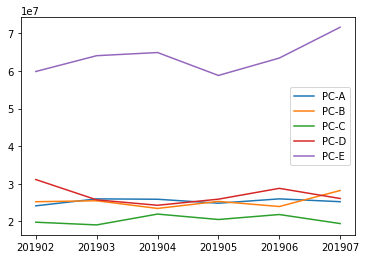

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()  